
    SYS Unit cell
    SYS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    SYS Number of periodic dimensions: 3
    SYS Cell parameter     a:    46.9370
    SYS Cell parameter     b:    44.1214
    SYS Cell parameter     c:    45.1826
    SYS Cell parameter alpha:   90.00000
    SYS Cell parameter  beta:   90.00000
    SYS Cell parameter gamma:   90.00000
    SYS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


  XYZH5 Loading XYZ file './out7.xyz' into 'trajectory/pos' of HDF5 file
  XYZH5 'trajectory-out7.h5'

RDF DATA FOR THE X-AXIS [A]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95 3.05 3.15 3.25 3.35 3.45 3.55 3.65 3.75 3.85 3.95 4.05 4.15
 4.25 4.35 4.45 4.55 4.65 4.75 4.85 4.95 5.05 5.15 5.25 5.35 5.45 5.55
 5.65 5.75 5.85 5.95 6.05 6.15 6.25 6.35 6.45 6.55 6.65 6.75 6.85 6.95
 7.05 7.15 7.25 7.35 7.45 7.55 7.65 7.75 7.8

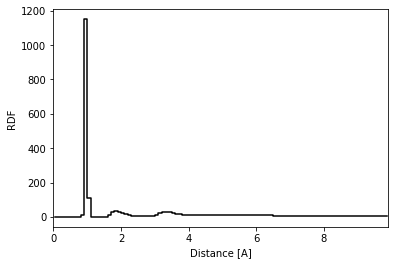

In [3]:
import numpy as np 
from yaff import *
#system = System.from_file('../training-set/dataset_1593.xyz', rvecs=np.diag([23.46511000, 23.46511000, 23.46511000])*angstrom)
system = System.from_file('./out7.xyz', rvecs=np.diag([46.93703259338623,44.1214358830923,45.18259257711876])*angstrom)

# Create a HDF5 file and convert the XYZ file to arrays in the HDF5 file
import h5py as h5
with  h5.File('trajectory-out7.h5', mode='w') as f:
    system.to_hdf5(f)
    xyz_to_hdf5(f, './out7.xyz')

    # Select two lists of atom indexes based on the ATSELECT rules '1' and '8'
    select0 = system.get_indexes('1')
    select1 = system.get_indexes('8')

    # Note. The remainder of the example may be moved to a separate script if
    # that would be more convenient, e.g. in case different RDFs must be generated.
    # This would avoid repetetive conversion of the XYZ file.

    # Create the RDF.
    rdf = RDF(10*angstrom, 0.1*angstrom, f, max_sample=10000, select0=select0, select1=select1)
    # One may make plots with the rdf object ...
    rdf.plot()
    # ... or access the results as Numpy arrays
    print()
    print('RDF DATA FOR THE X-AXIS [A]')
    print(rdf.d/angstrom)
    print()
    print('RDF DATA FOR THE Y-AXIS')
    print(rdf.rdf)